In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('./data/protein_data.csv')
data.head()

,sequence,classification
0,AQLVDSMPSASTGSVVVTDDLNYWGGRRIKSKDGATTEPVFEPATG...,OXIDOREDUCTASE
1,MGAFLDKPKMEKHNAQGQGNGLRYGLSSMQGWRVEMEDAHTAVIGL...,HYDROLASE
2,STAGKVIKCKAAVLWEEKKPFSIEEVEVAPPKAHEVRIKMVATGIC...,OXIDOREDUCTASE
3,KETAAAKFERQHMDSSTSAASSSNYCNQMMKSRNLTKDRCKPVNTF...,HYDROLASE
4,IVGGYTCQENSVPYQVSLNSGYHFCGGSLINDQWVVSAAHCYKSRI...,HYDROLASE


In [3]:
X = data['sequence']
y = data['classification']

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
class_names = le.classes_
n_classes = len(class_names)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [5]:
vect = CountVectorizer(analyzer = 'char_wb', ngram_range = (4,4))
vect.fit(X_train)
X_train_df = vect.transform(X_train)
X_test_df = vect.transform(X_test)

## Naive Bayes

In [6]:
prediction = dict()

from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_df, y_train)
NB_pred = model.predict(X_test_df)
prediction["MultinomialNB"] = accuracy_score(NB_pred, y_test)
print(prediction['MultinomialNB'])

0.8430532998671194


<Axes: >

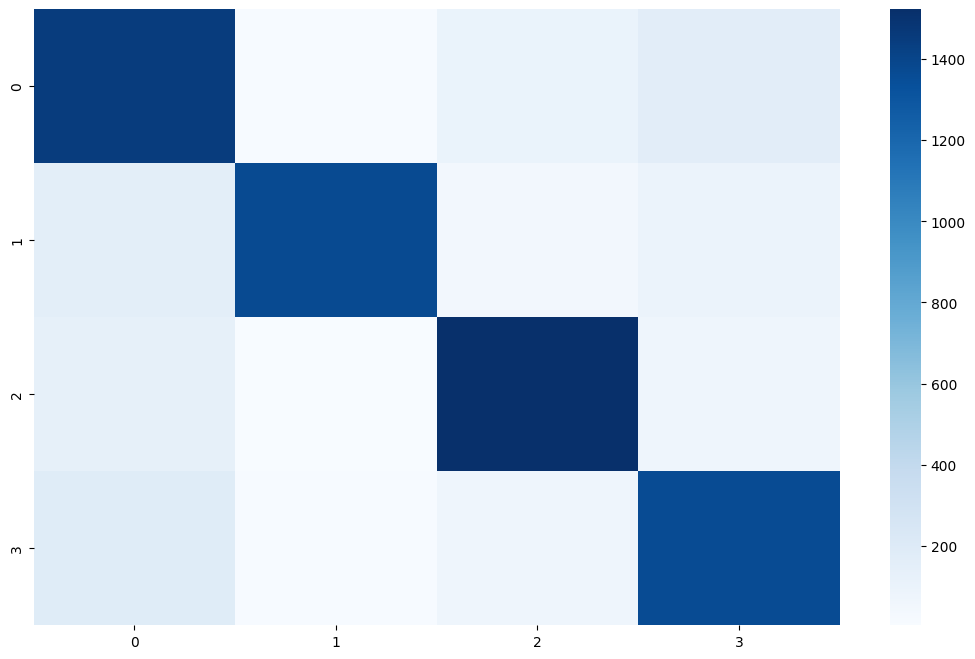

In [7]:
conf_mat = confusion_matrix(y_test, NB_pred)
fig , ax = plt.subplots()
fig.set_size_inches(13, 8)
sns.heatmap(conf_mat, cmap="Blues")

## xgboost

In [8]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train_df,y_train)
XGB_pred = model.predict(X_test_df)
prediction["XGB"] = accuracy_score(XGB_pred , y_test)
print(prediction["XGB"])

0.797430975933855


<Axes: >

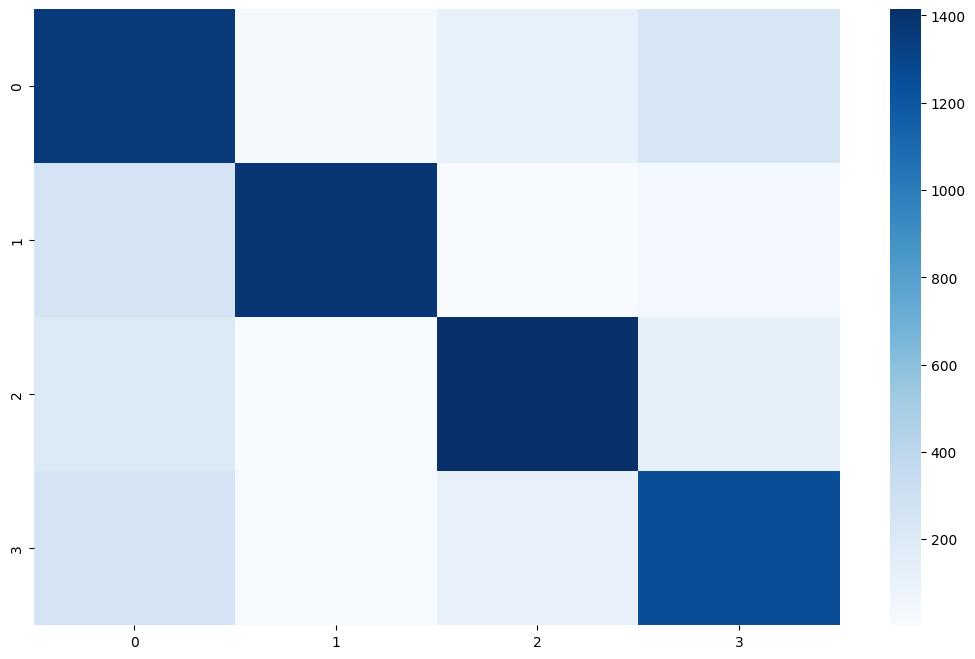

In [9]:
conf_mat = confusion_matrix(y_test, XGB_pred)
fig , ax = plt.subplots()
fig.set_size_inches(13, 8)
sns.heatmap(conf_mat, cmap="Blues")

## Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(n_jobs=-1)
model.fit(X_train_df,y_train)
LR_pred = model.predict(X_test_df)
prediction["Logistic Regression"] = accuracy_score(LR_pred , y_test)
print(prediction["Logistic Regression"])

0.8932526206998376


<Axes: >

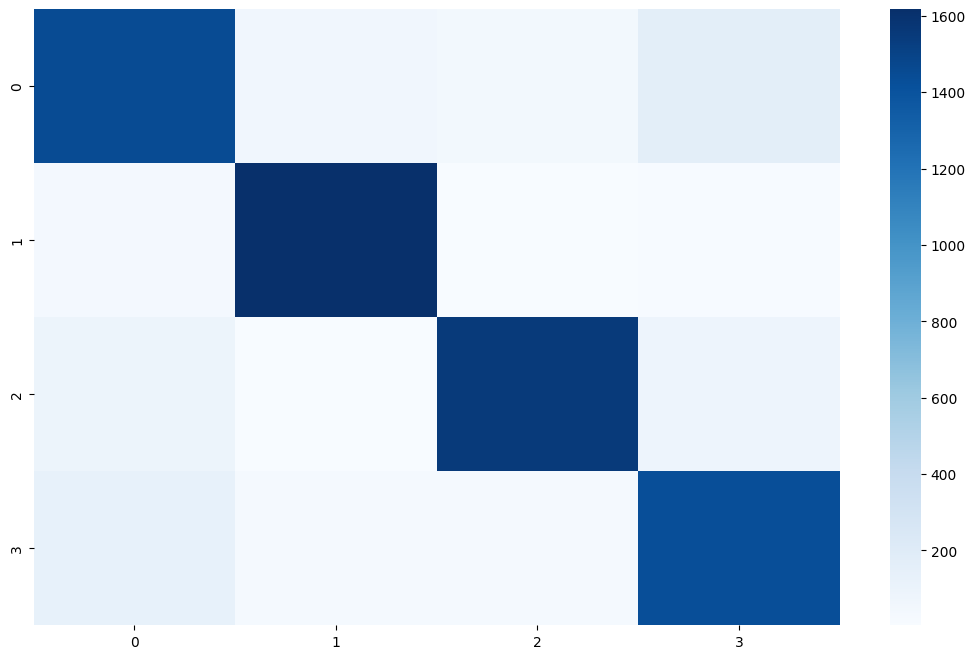

In [11]:
conf_mat = confusion_matrix(y_test, LR_pred)
fig , ax = plt.subplots()
fig.set_size_inches(13, 8)
sns.heatmap(conf_mat, cmap="Blues")

## KNN

In [12]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_jobs=-1)
model.fit(X_train_df,y_train)
KNN_pred = model.predict(X_test_df)
prediction["KNN"] = accuracy_score(KNN_pred , y_test)
print(prediction["KNN"])

0.619518677100251


<Axes: >

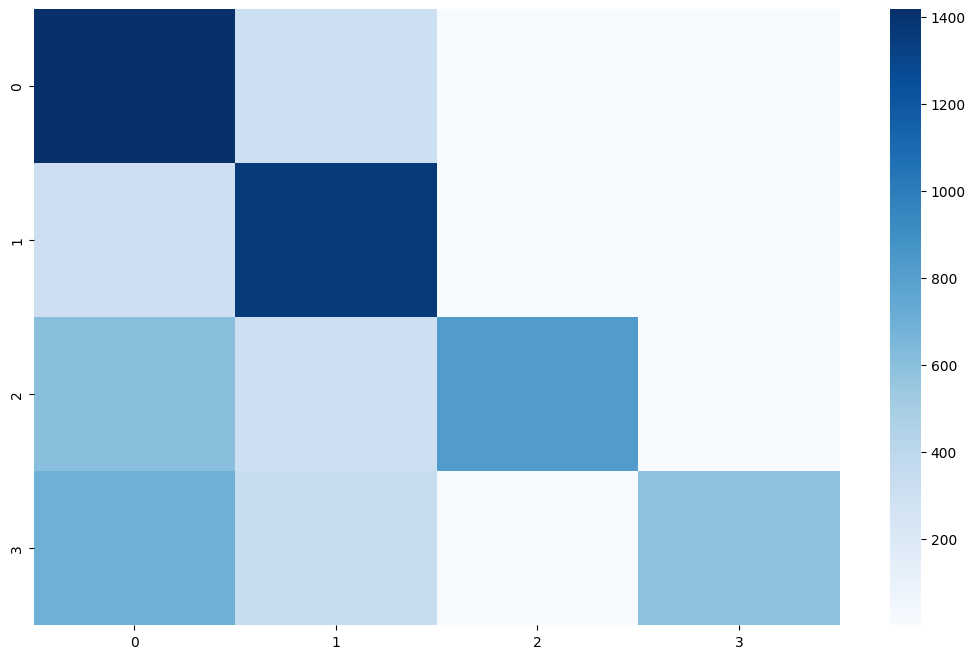

In [13]:
conf_mat = confusion_matrix(y_test, KNN_pred)
fig , ax = plt.subplots()
fig.set_size_inches(13, 8)
sns.heatmap(conf_mat, cmap="Blues")

## Results

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(y_true, y_pred, average='weighted'):
    results = {
        "accuracy": accuracy_score(y_true, y_pred),
        "precision": precision_score(y_true, y_pred, average=average, zero_division=0),
        "recall": recall_score(y_true, y_pred, average=average, zero_division=0),
        "f1_score": f1_score(y_true, y_pred, average=average, zero_division=0),
    }
    return results

In [15]:
prediction

{'MultinomialNB': 0.8430532998671194,
 'XGB': 0.797430975933855,
 'Logistic Regression': 0.8932526206998376,
 'KNN': 0.619518677100251}

In [16]:
NB_results = evaluate_model(y_test, NB_pred)
NB_results

{'accuracy': 0.8430532998671194,
 'precision': 0.8516494462995303,
 'recall': 0.8430532998671194,
 'f1_score': 0.8448972689451124}

In [17]:
XGB_results = evaluate_model(y_test, XGB_pred)
XGB_results

{'accuracy': 0.797430975933855,
 'precision': 0.8113633431521116,
 'recall': 0.797430975933855,
 'f1_score': 0.8014058624163943}

In [18]:
LR_results = evaluate_model(y_test, LR_pred)
LR_results

{'accuracy': 0.8932526206998376,
 'precision': 0.8943830761530993,
 'recall': 0.8932526206998376,
 'f1_score': 0.8934442782372416}

In [19]:
KNN_results = evaluate_model(y_test, KNN_pred)
KNN_results

{'accuracy': 0.619518677100251,
 'precision': 0.7563008946573829,
 'recall': 0.619518677100251,
 'f1_score': 0.613063126557477}

In [20]:
import matplotlib.pyplot as plt
import numpy as np

def plot_all_models(results_dict):
    metrics = ["accuracy", "precision", "recall", "f1_score"]
    n_metrics = len(metrics)
    n_models = len(results_dict)

    x = np.arange(n_metrics)  # metric positions
    width = 0.12              # bar width (adjust if many models)

    plt.figure(figsize=(12, 6))

    for i, (model_name, scores) in enumerate(results_dict.items()):
        values = [scores[m] for m in metrics]
        plt.bar(x + i*width, values, width=width, label=model_name)

    # Formatting
    plt.xticks(x + (n_models-1)*width/2, [m.capitalize() for m in metrics])
    plt.ylim(0, 1.1)
    plt.ylabel("Score")
    plt.title("Performance Comparison of Models")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

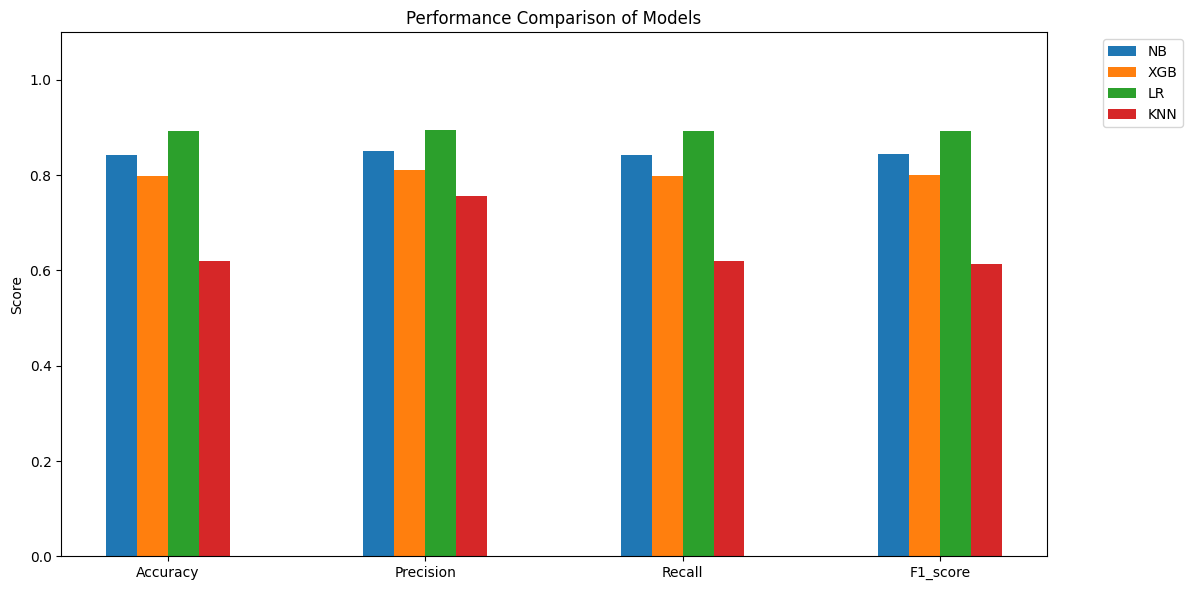

In [21]:
results_dict = {
    "NB": NB_results,
    "XGB": XGB_results,
    "LR": LR_results,
    "KNN": KNN_results
}

plot_all_models(results_dict)